In [1]:
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import numpy as np
import random
import os

In [2]:
input_folder = r'\\filenest.diskstation.me\Wilbrecht_file_server\Madeline\processed_data\JUV011\211215\suite2p\plane0'

In [3]:
Fraw = np.load(os.path.join(input_folder, 'F.npy'))
ops = np.load(os.path.join(input_folder, 'ops.npy'),allow_pickle=True)
neuropil = np.load(os.path.join(input_folder, 'Fneu.npy'))
cells = np.load(os.path.join(input_folder, 'iscell.npy'))
stat = np.load(os.path.join(input_folder, 'stat.npy'),allow_pickle=True)

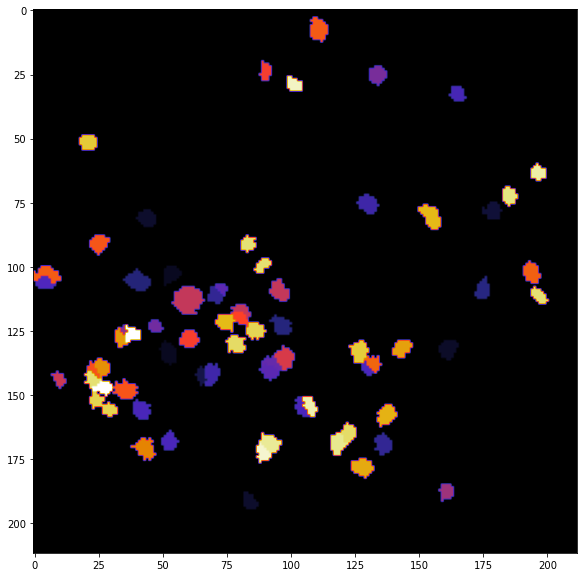

In [4]:
# plot ROIs
im = np.zeros((212,212)) # find the values here by looking for 'Ly' and 'Lx' in ops
for cell in range(0,cells.shape[0]):
    if cells[cell,0] > 0:
        xs = stat[cell]['xpix']
        ys = stat[cell]['ypix']
        im[ys, xs] = random.random()
fig = plt.figure(figsize=(10,10))
pos = plt.imshow(im, cmap='CMRmap')

In [5]:
# create a new array (Fcells) with F data for each cell

F = Fraw - neuropil*0.7 # subtract neuropil

# find number of cells
numcells = 0
for cell in range(0,len(cells)):
    if cells[cell,0] == 1.0: # if ROI is a cell
        numcells += 1

Fcells = np.zeros((numcells,F.shape[1]))
counter = 0
for cell in range(0,len(cells)):
    if cells[cell,0] == 1.0: # if ROI is a cell
        Fcells[counter] = F[cell]
        counter += 1

In [6]:
numcells

69

In [7]:
# calculate baseline
#F0 = mean of the fluorescence values that are less than 2std above the overall mean for that ROI
F0 = []
for cell in range(0,Fcells.shape[0]):
    include_frames = []
    std = np.std(Fcells[cell])
    avg = np.mean(Fcells[cell])
    for frame in range(0,Fcells.shape[1]):
        if Fcells[cell, frame] < std+avg:
            include_frames.append(Fcells[cell,frame])
    F0.append(np.mean(include_frames))

In [8]:
# calculate dF/F
dFF = np.zeros(Fcells.shape)
for cell in range(0,Fcells.shape[0]):
    for frame in range(0,Fcells.shape[1]):
        dFF[cell, frame] = (Fcells[cell, frame] - F0[cell]) / F0[cell]

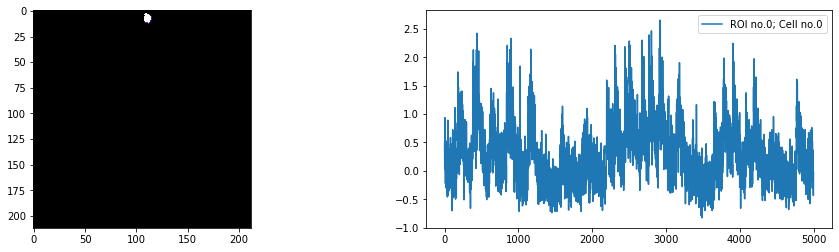

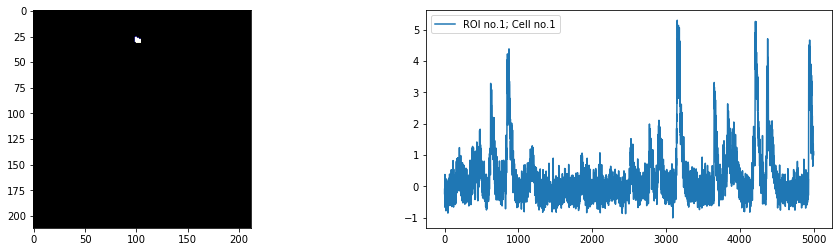

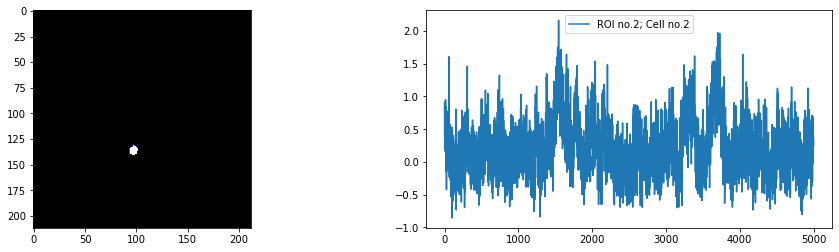

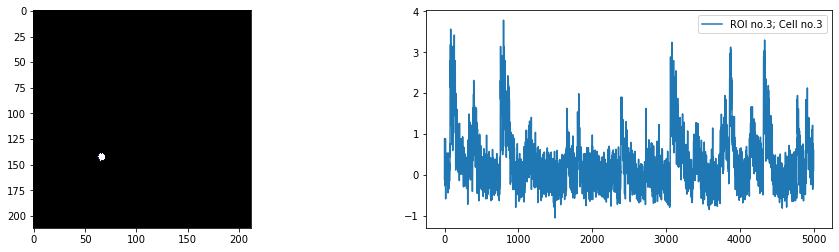

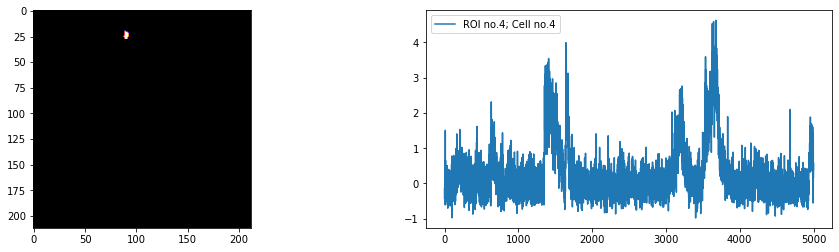

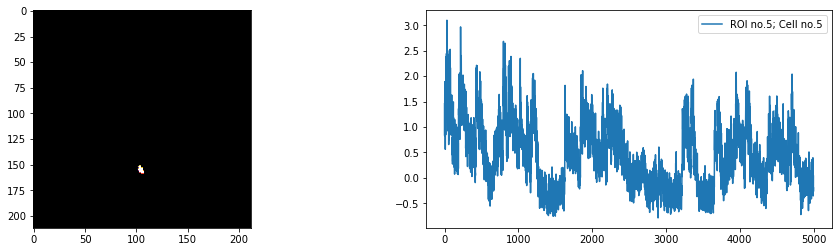

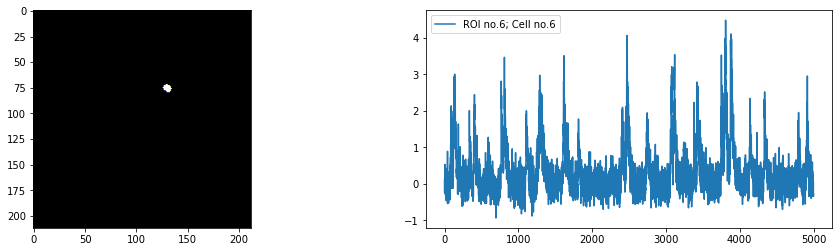

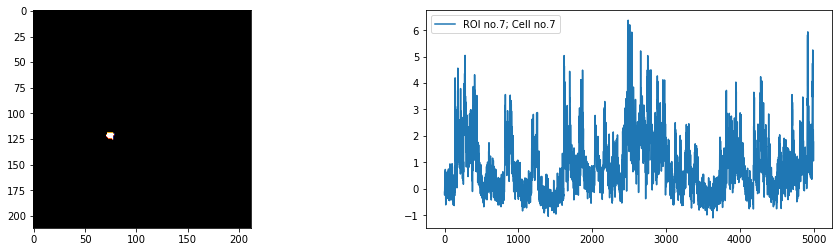

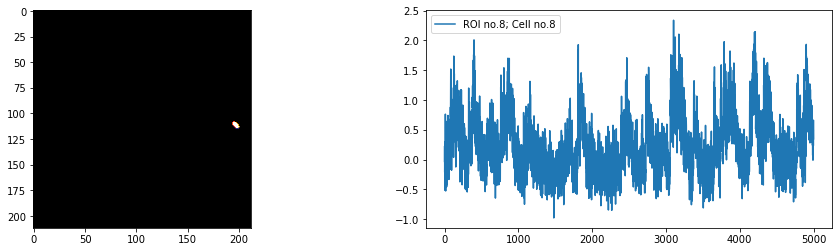

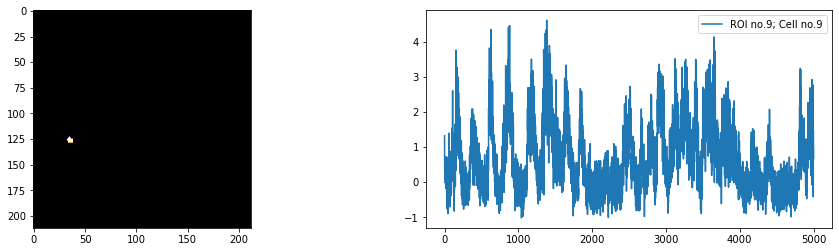

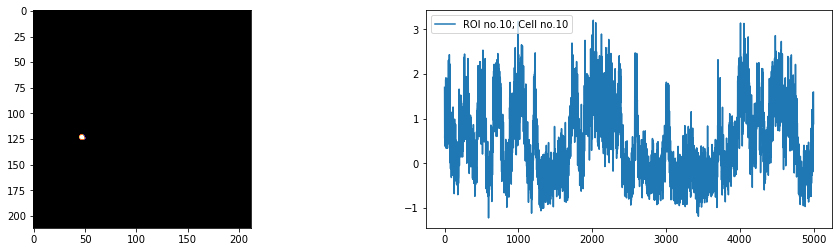

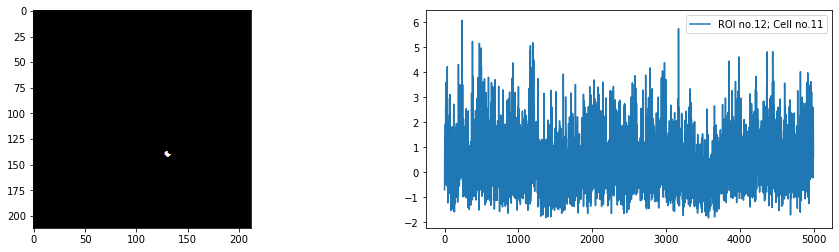

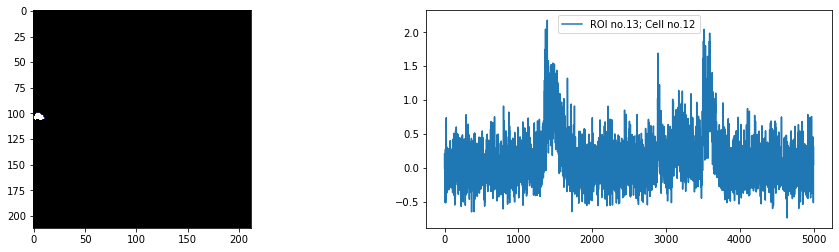

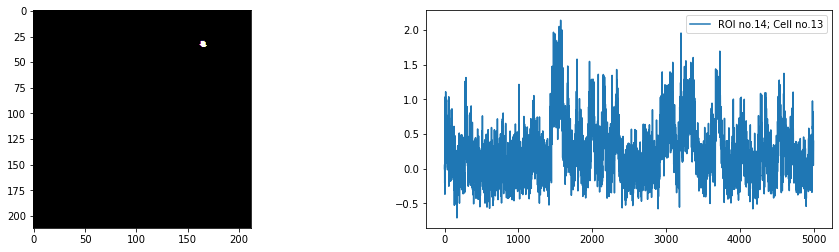

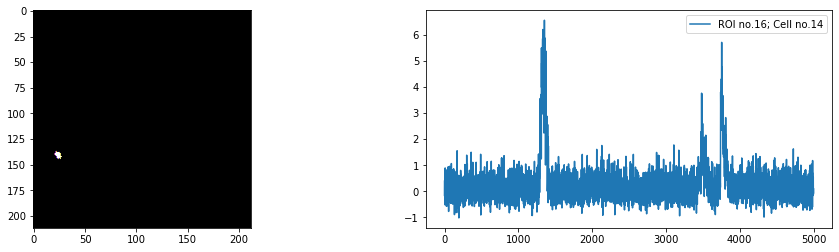

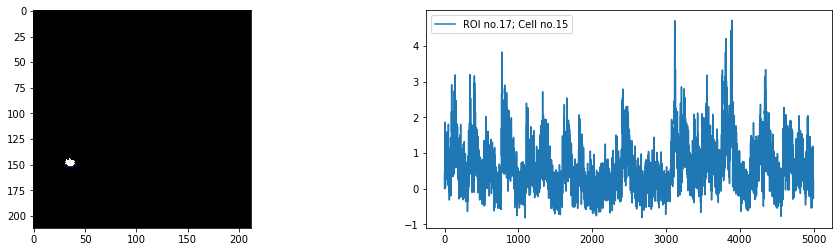

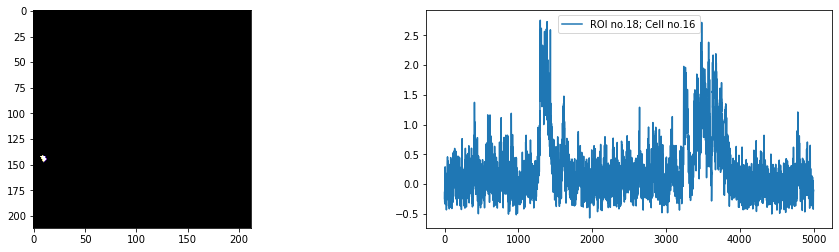

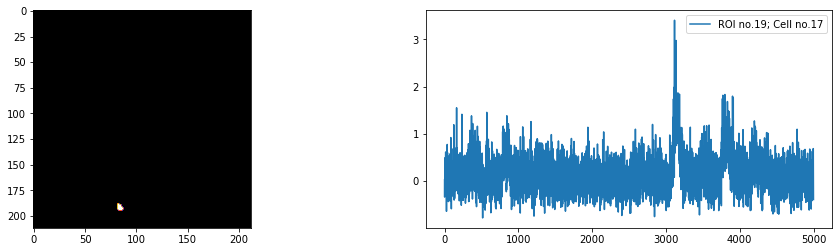

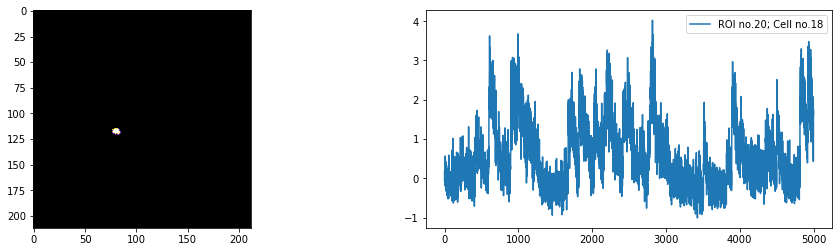

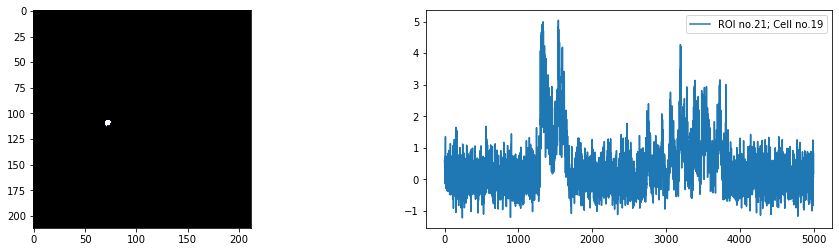

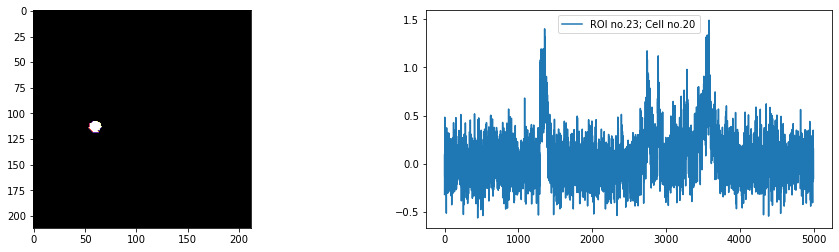

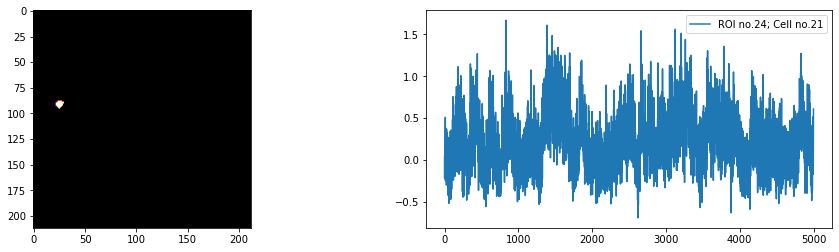

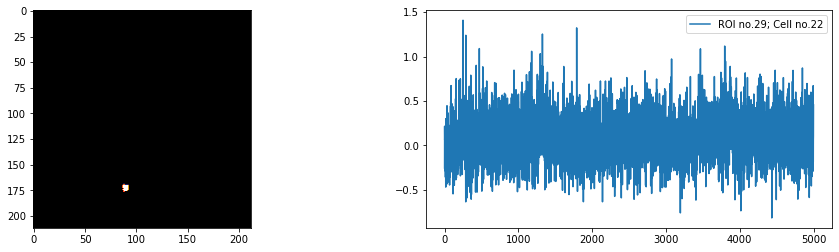

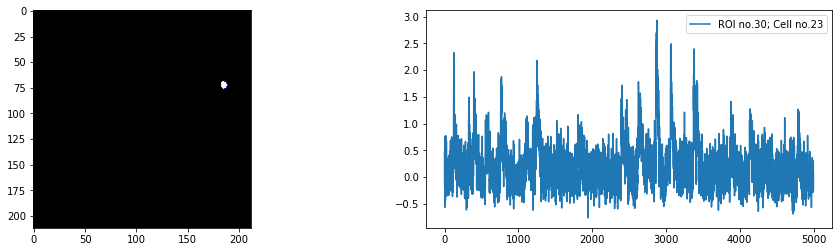

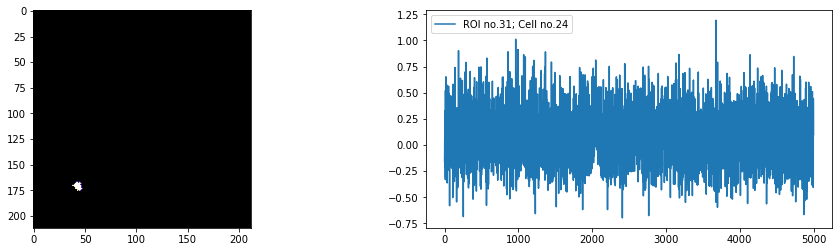

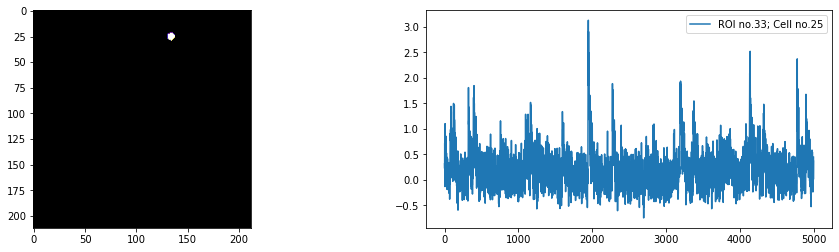

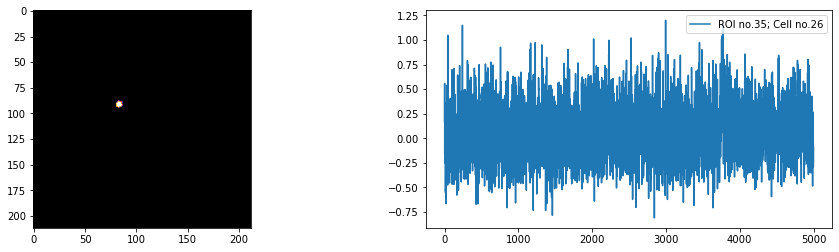

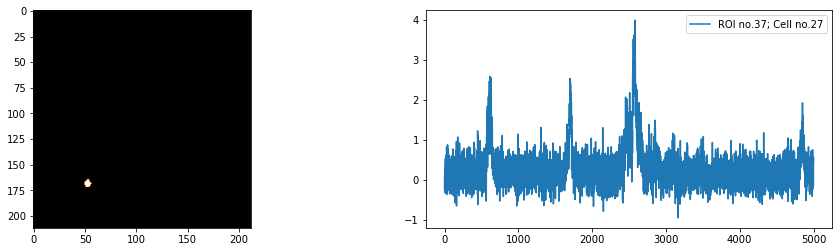

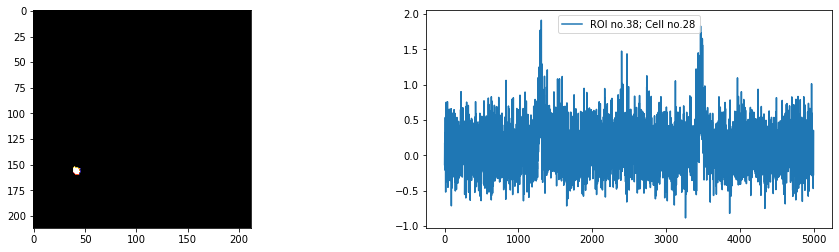

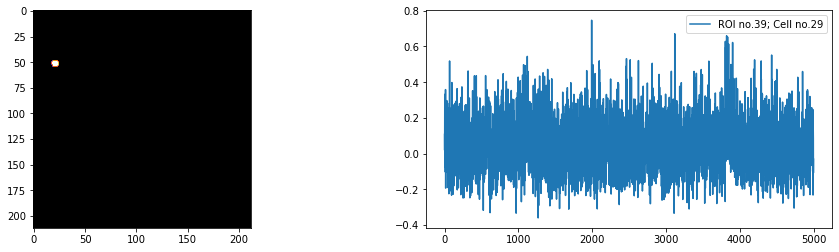

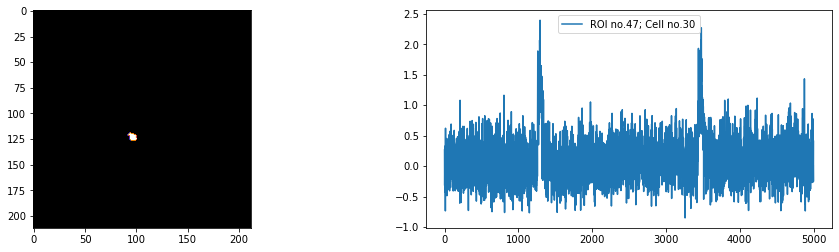

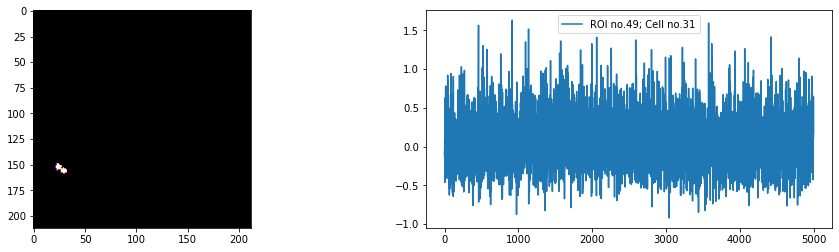

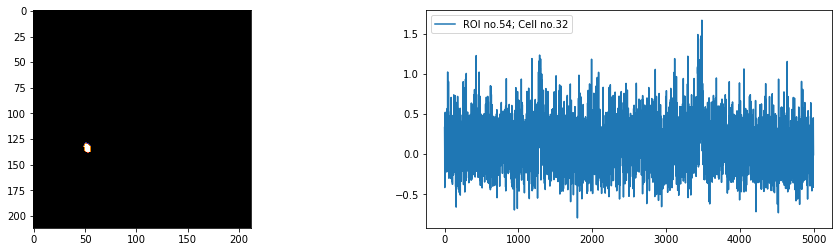

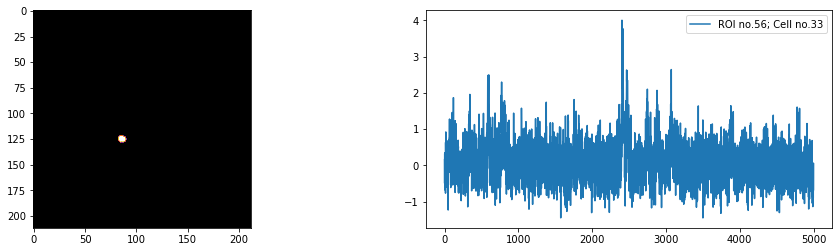

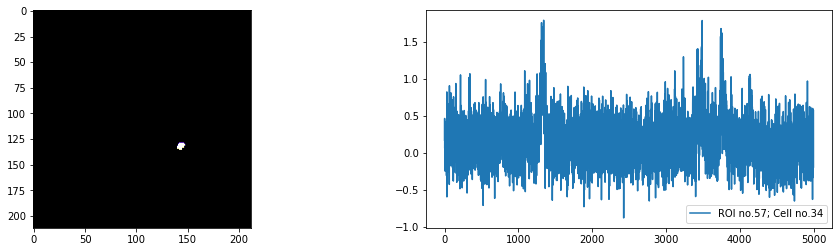

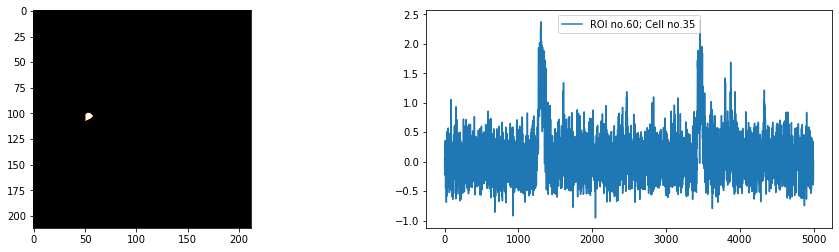

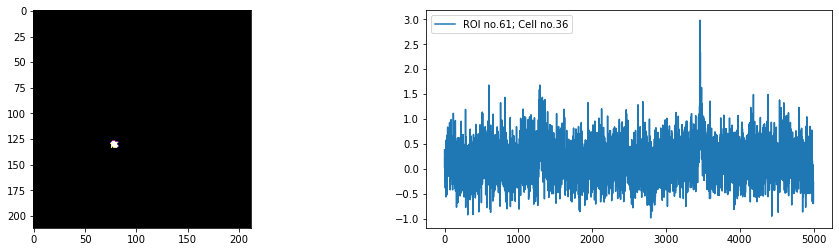

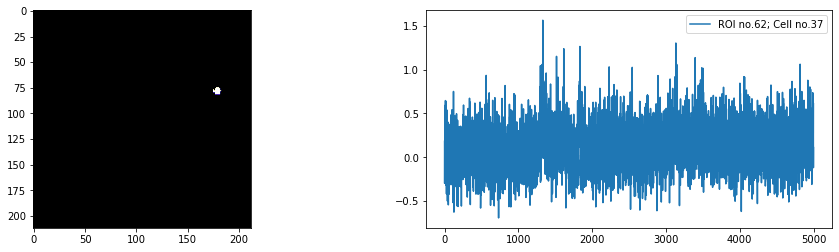

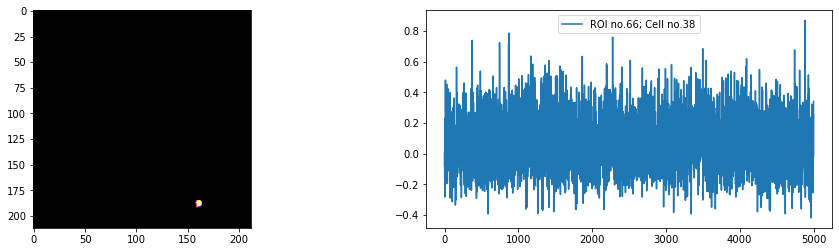

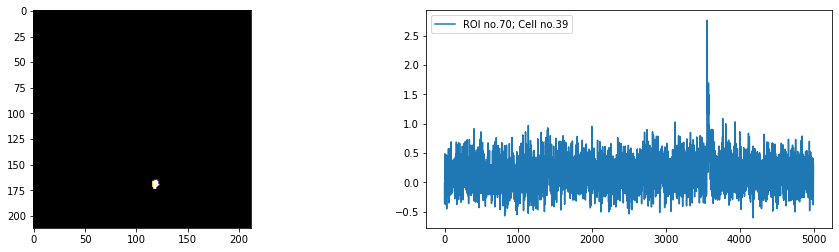

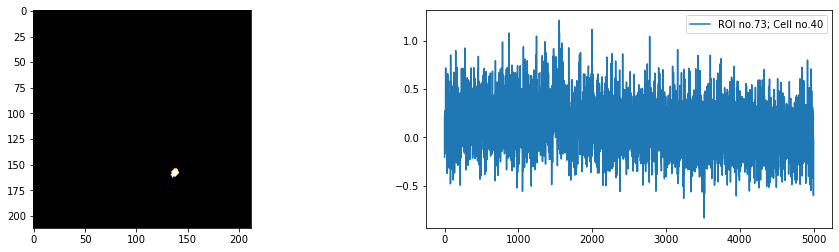

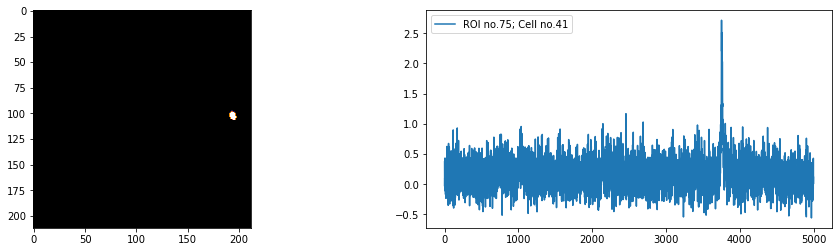

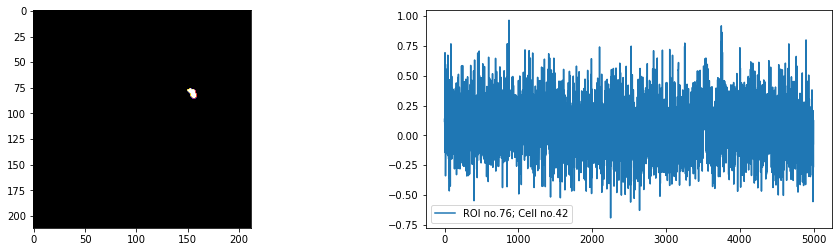

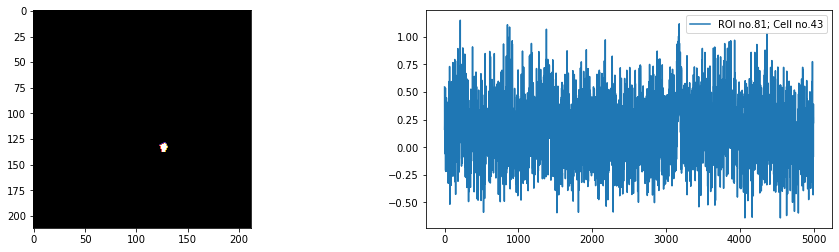

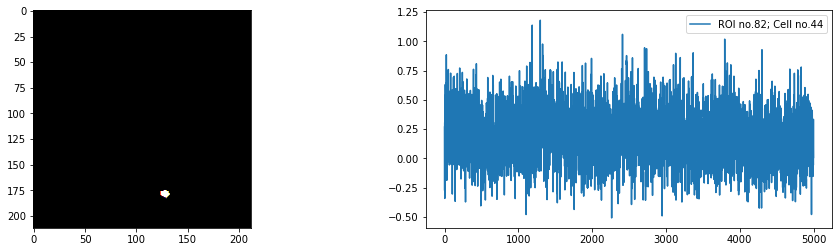

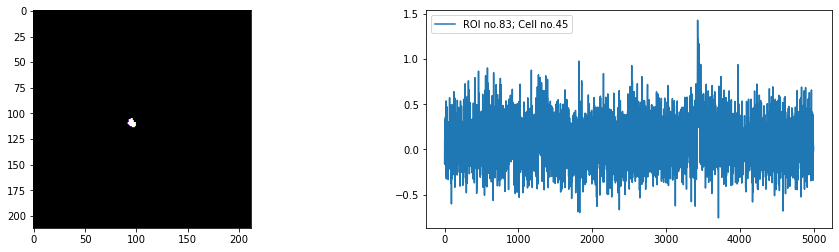

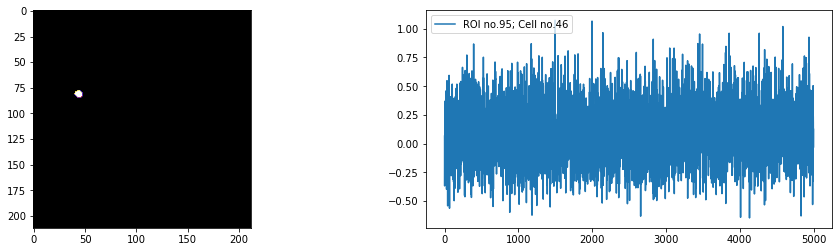

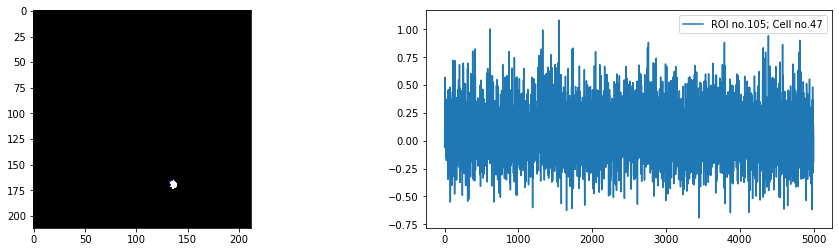

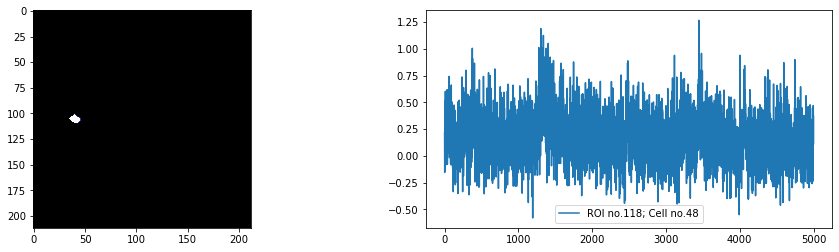

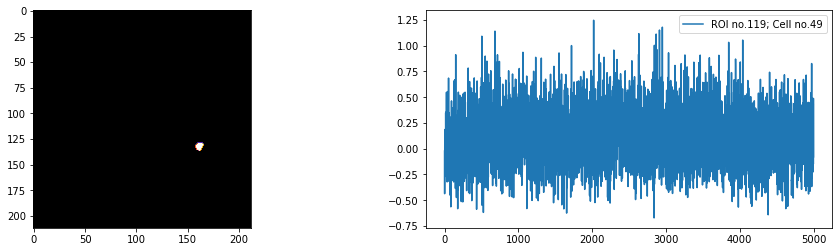

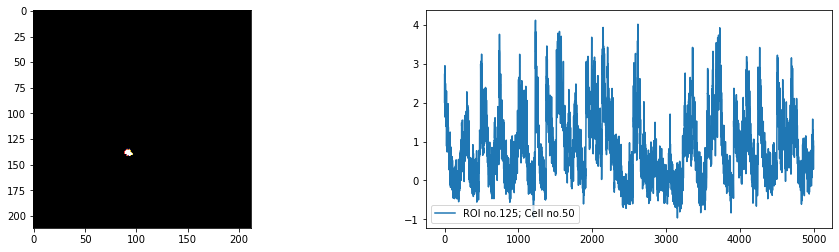

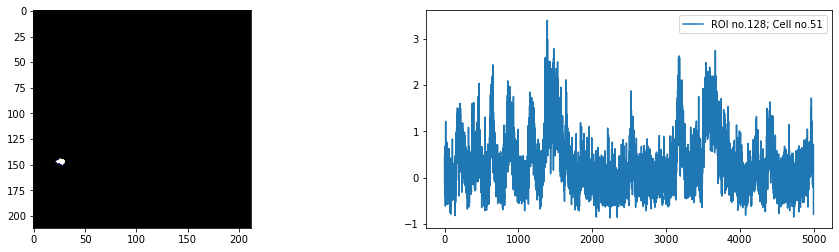

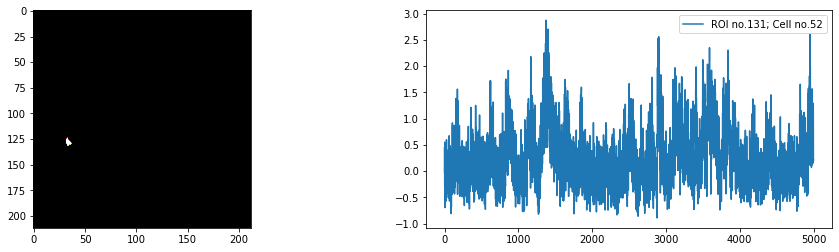

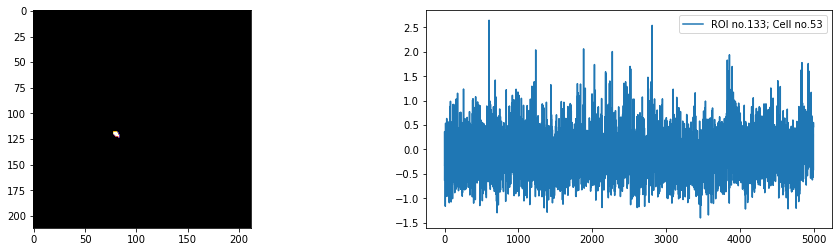

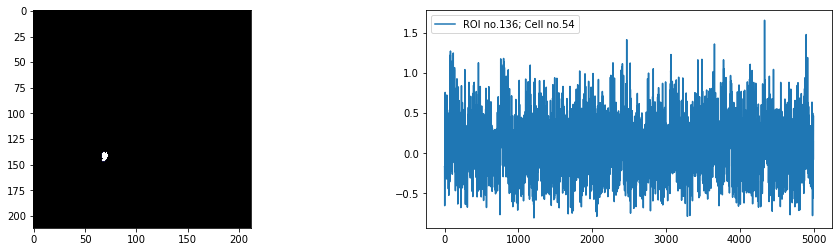

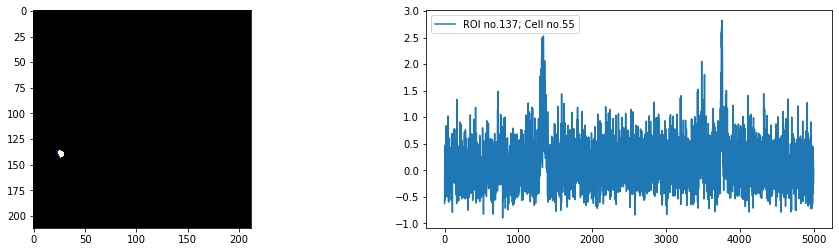

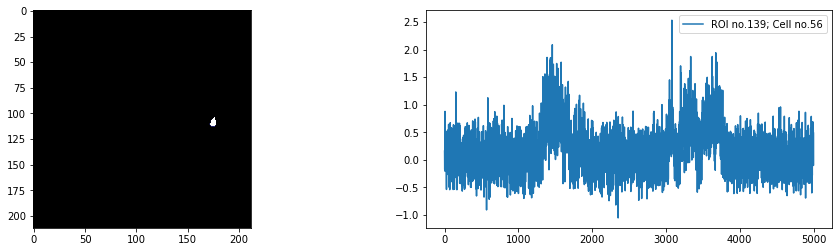

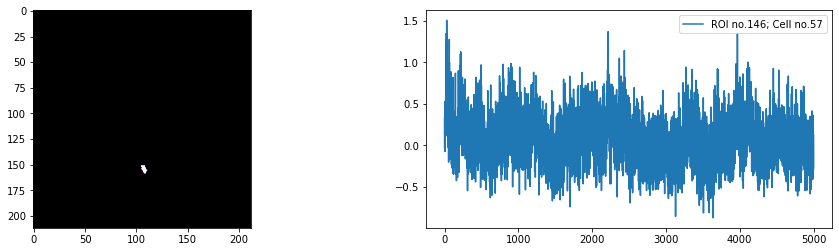

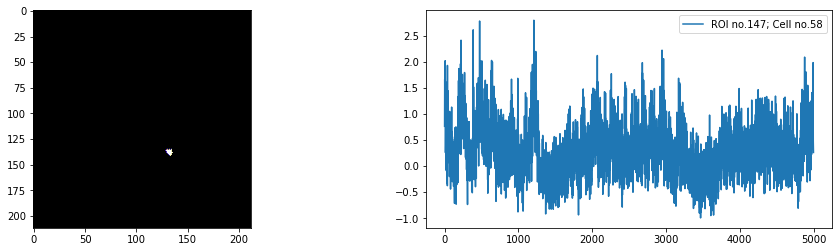

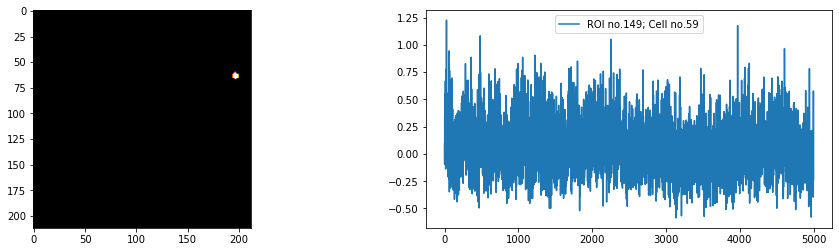

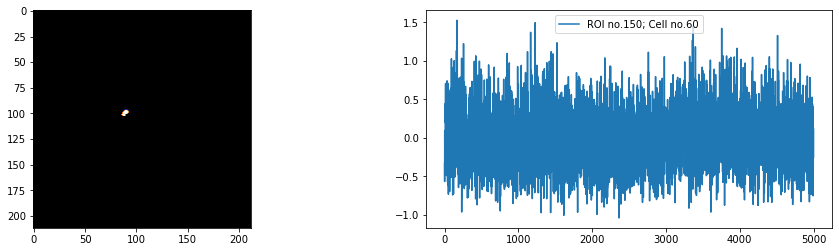

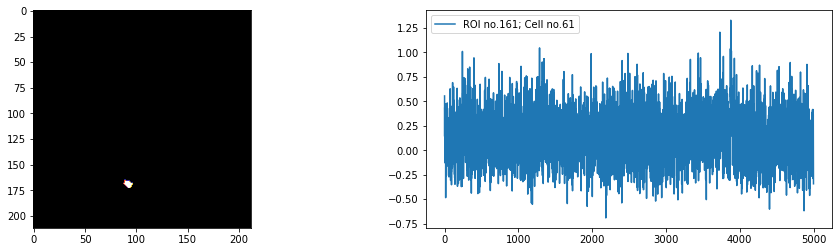

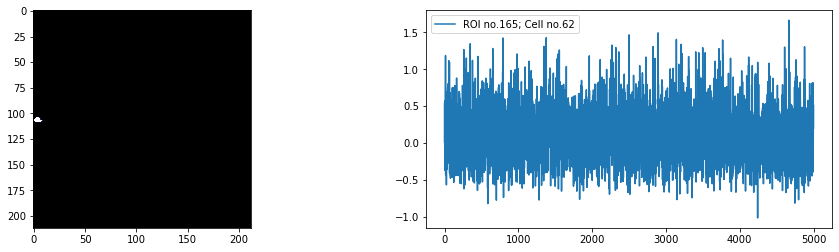

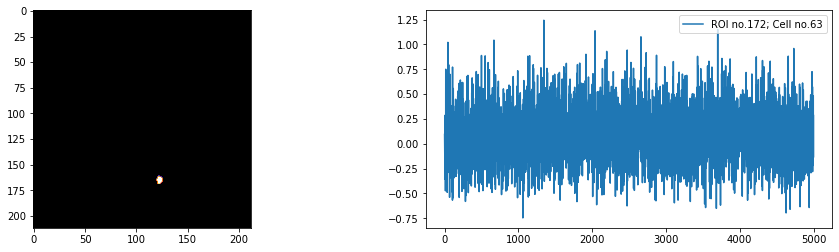

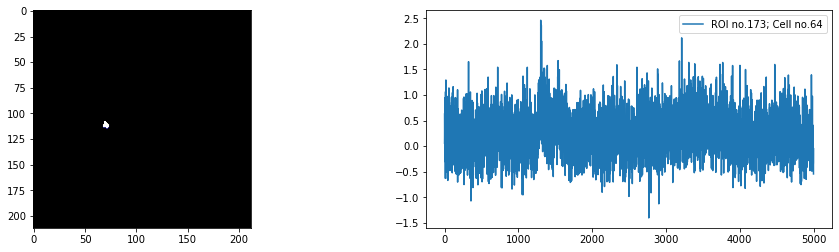

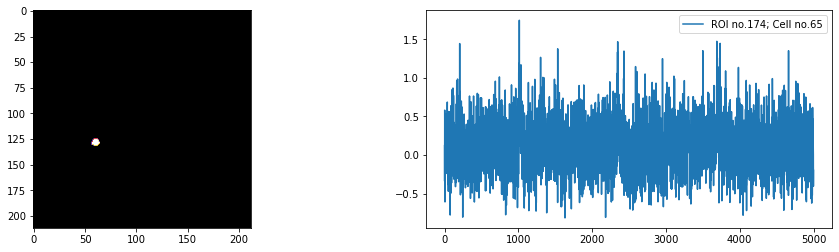

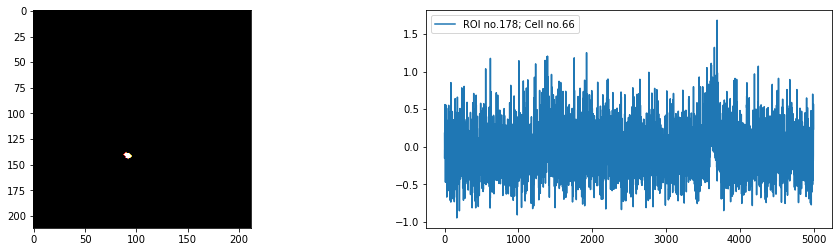

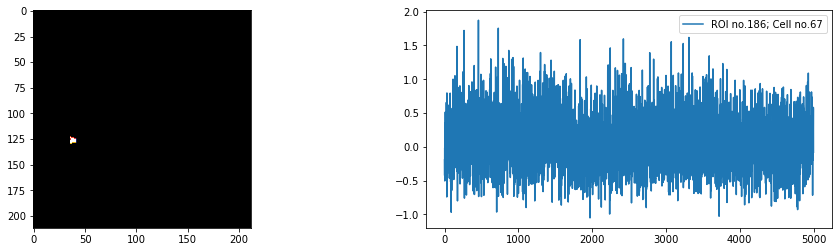

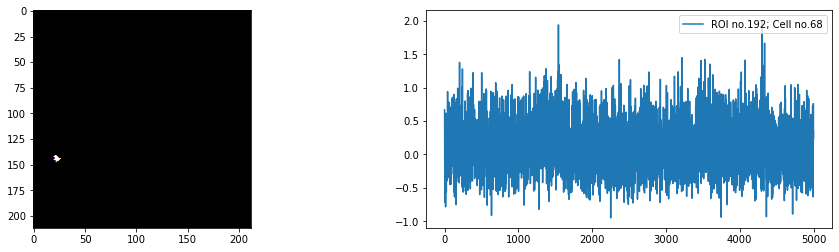

In [9]:
counter = -1
for cell in range(0,cells.shape[0]):
    if cells[cell,0] > 0:
        counter += 1
        im = np.zeros((212,212))
        xs = stat[cell]['xpix']
        ys = stat[cell]['ypix']
        im[ys, xs] = random.random()
        plt.figure(figsize=(16,4))
        #fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]})
        plt.subplot(1, 2, 1)
        plt.imshow(im, cmap='CMRmap')
        plt.subplot(1, 2, 2)
        plt.plot(dFF[counter,15000:20000], label = "ROI no." + str(cell) + "; Cell no." + str(counter))
        plt.legend()